In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [23]:
data = pd.read_csv('/home/hasan/DATA SET/air-passengers/AirPassengers.csv')

In [24]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [25]:
data.shape

(144, 2)

In [26]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [27]:
data = data['Passengers']

Text(0.5, 1.0, 'Original data')

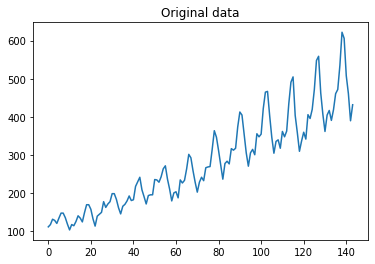

In [28]:
plt.plot(data)
plt.title('Original data')

In [29]:
data = np.array(data).reshape(-1,1)

### Feature scale

In [30]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

### dividing dataset into train test 

In [33]:
train_size = int(len(data)*.70) 
test_size = len(data) - train_size

train,test = data[0:train_size, :], data[train_size:, :]
print('Shape of train :',train.shape)
print('Shape of test :',test.shape)

Shape of train : (100, 1)
Shape of test : (44, 1)


### Feature and Label Data

In [34]:
def feature_label(data, time_step=1):
    feature=[]
    label = []
    for i in range(len(data)-time_step-1):
        f = data[i:(i+time_step),0]
        l = data[i+time_step, 0]
        feature.append(f)
        label.append(l)
        
    return np.array(feature), np.array(label)

In [35]:
time_step = 1
trainX, trainY = feature_label(train, time_step)
testX, testY = feature_label(test, time_step)

### Reshaping trainX and testX

In [36]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1],1)

In [37]:
print('Shape of trainX :', trainX.shape)
print('Shape of testX :',testX.shape)

Shape of trainX : (98, 1, 1)
Shape of testX : (42, 1, 1)


### Model

In [38]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_step)))
model.add(Dense(1))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [41]:
model.fit(trainX,trainY, epochs=100, batch_size=1)

Train on 98 samples
Epoch 1/100
98/98 [==============================] - 3s 32ms/sample - loss: 0.0273
Epoch 2/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0115
Epoch 3/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0091
Epoch 4/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0070
Epoch 5/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0052
Epoch 6/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 7/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0030
Epoch 8/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0026
Epoch 9/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0023
Epoch 10/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0023
Epoch 11/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0022
Epoch 12/100
98/98 [==============================] - 0s 3ms/sample - loss:

### Predict with test data

In [42]:
predict = model.predict(testX)

In [43]:
predict = scaler.inverse_transform(predict)

In [44]:
ytest = testY.reshape(-1,1)
ytest = scaler.inverse_transform(ytest)

### plot of predict and ytest 

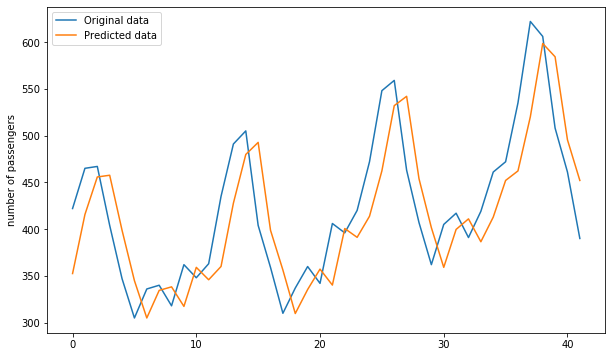

In [46]:
plt.figure(figsize=(10,6))
plt.plot(ytest, label='Original data')
plt.plot(predict, label='Predicted data')
plt.ylabel('number of passengers')
plt.legend()
plt.show()